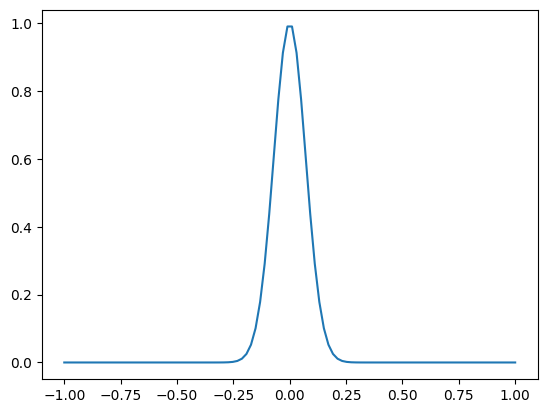

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Parameters
L = 2  # Length of the domain (from -1 to 1)
Nx = 100  # Number of spatial points
Nt = 200  # Number of time points
c = 1  # Wave speed
dx = L / Nx
dt = 0.01
alpha = 100  # Gaussian width parameter

# Spatial and temporal grids
x = np.linspace(-1, 1, Nx)
t = np.linspace(0, Nt*dt, Nt)

# Initial condition: Gaussian
u_initial = np.exp(-alpha * x**2)

# Initialize the wave field
u = np.zeros((Nt, Nx))
u[0, :] = u_initial

# Finite difference method
for n in range(0, Nt - 1):
    for i in range(1, Nx - 1):
        u[n + 1, i] = u[n, i] + dt**2 * c**2 * (u[n, i - 1] - 2*u[n, i] + u[n, i + 1]) / dx**2

    # Neumann boundary conditions
    u[n + 1, 0] = u[n + 1, 1]
    u[n + 1, -1] = u[n + 1, -2]

# Visualization using animation
fig, ax = plt.subplots()
line, = ax.plot(x, u[0, :])

def update(num, u, line):
    line.set_data(x, u[num, :])
    return line,


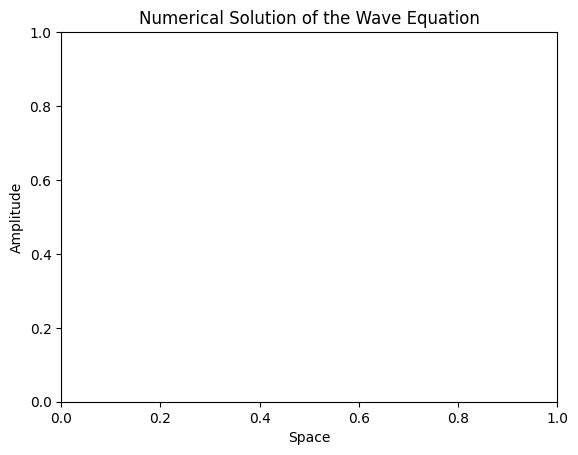

In [2]:

ani = animation.FuncAnimation(fig, update, Nt, fargs=(u, line), interval=25)

plt.title('Numerical Solution of the Wave Equation')
plt.xlabel('Space')
plt.ylabel('Amplitude')
plt.show()


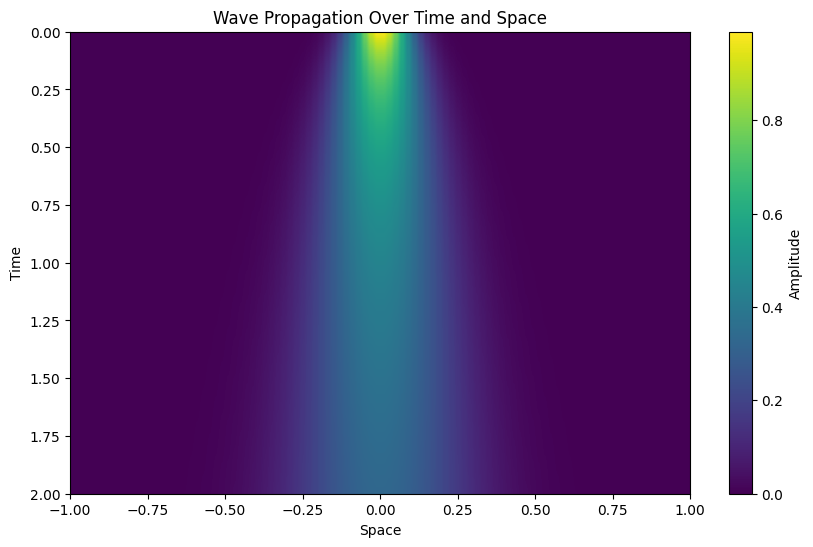

In [3]:
# Create a static plot (heatmap) showing the evolution of the wave over time
plt.figure(figsize=(10, 6))
plt.imshow(u, extent=[-1, 1, Nt*dt, 0], aspect='auto', cmap='viridis')

plt.title('Wave Propagation Over Time and Space')
plt.xlabel('Space')
plt.ylabel('Time')
plt.colorbar(label='Amplitude')
plt.show()
